# **Working memory training**: FPN & DMN plots

**Last edited:** 12-20-2018

Step 0: Loading libraries
---------------------------------

In [12]:
%matplotlib inline

import sys
sys.path.append("..")
import os

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from fctools import networks, figures

#---- matplotlib settings
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'

Step 1: Selecting subjects to analysis
--------------------------------------------

In [13]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/'

# Selecting subjects which finished the study
groups = pd.read_csv('../data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]
subs = trained_subs['sub'].values

# Creating vectors to filter by group
experimental = (trained_subs == 'Experimental')
control = (trained_subs == 'Control')

exp_vector = experimental['group'].values
con_vector = control['group'].values

# Dualnback - selecting subjects included into dinal analysis and creating group assignment vectors
dualnback_exclude = ['sub-13', 'sub-21', 'sub-23', 'sub-50'] # higly motion subjects in one of four sessions
dual_vector = [True if sub not in dualnback_exclude else False for sub in subs]
exp_vector = exp_vector[dual_vector]
con_vector = con_vector[dual_vector]

subs = trained_subs['sub'][dual_vector].values

n = sum(dual_vector)
print(f'Number of subject after excluding subjects with higly motion: {n}')

Number of subject after excluding subjects with higly motion: 42


Step 2: Getting modules names and color pallete
----------------------------------------

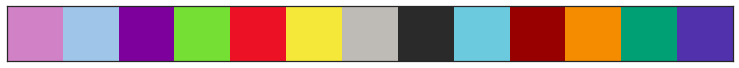

In [14]:
labels = pd.read_csv('../support/modules.txt', sep = " ", header = None)

power_colors_new = {'AU':'#d182c6', 
                'CER':'#9fc5e8', 
                'CO':'#7d009d', 
                'DA':'#75df33', 
                'DM':'#ed1126', 
                'FP':'#f6e838', 
                'MEM':'#bebab5', 
                'SAL':'#2a2a2a', 
                'SOM':'#6ccadf', 
                'SUB':'#980000', 
                'UNC':'#f58c00', 
                'VA':'#00a074', 
                'VIS':'#5131ac',}

modules = sorted(labels[0].values)
network_pal = (sns.color_palette(power_colors_new.values()))
sns.palplot(sns.color_palette(power_colors_new.values()))

network_lut = dict(zip(map(str, np.unique(modules)), network_pal))

network_colors = pd.Series(modules).map(network_lut)
network_colors = np.asarray(network_colors)

n_roi = len(labels)
n_net = len(np.unique(modules))

Step 3: Loading allegiance matrices
-------------------------------------------------------------------------------

In [15]:
P = np.load(f'{top_dir}data/neuroimaging/03-modularity/dynamic/03-allegiance_matrices/allegiance_matrix_power_dualnback_opt_mean.npy')
P = P[dual_vector, :, : ,:]
P.shape

(42, 4, 264, 264)

Step 4: Plotting allegiance matrices (DM & FP)
---------------------------------

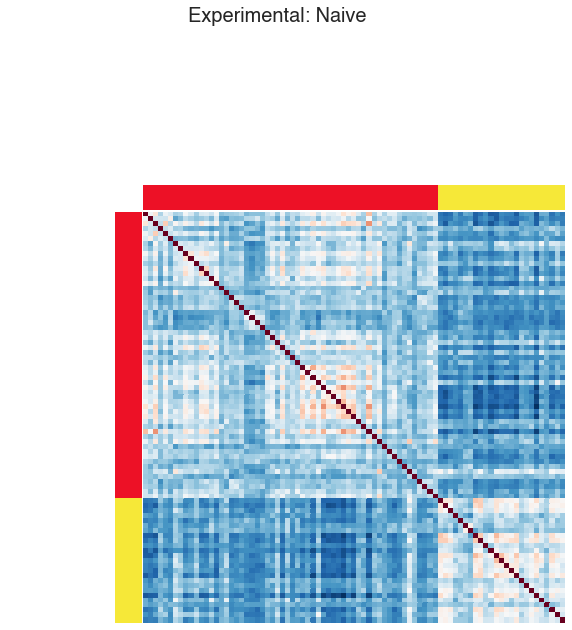

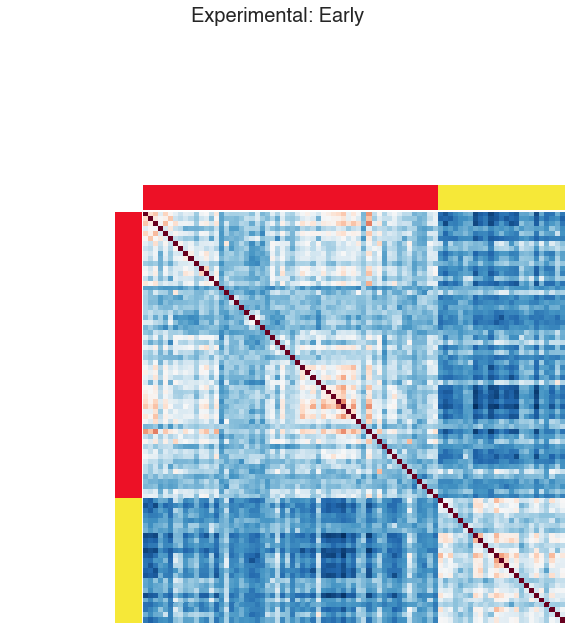

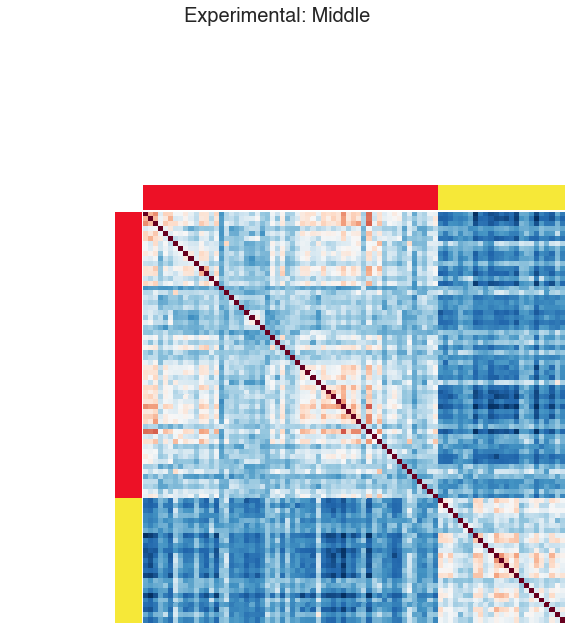

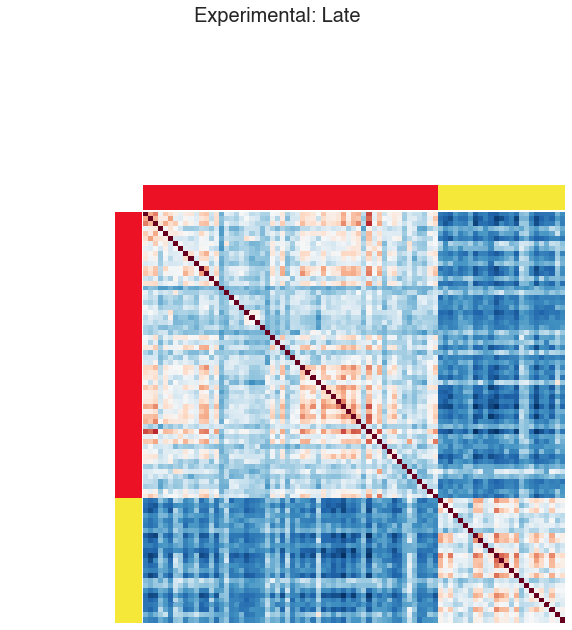

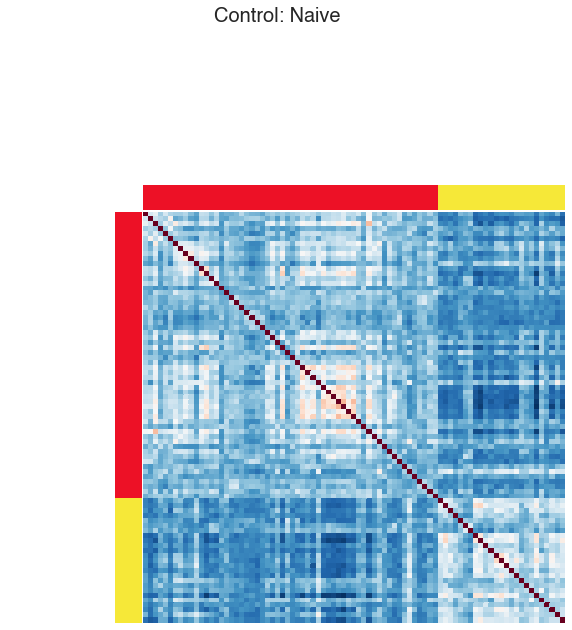

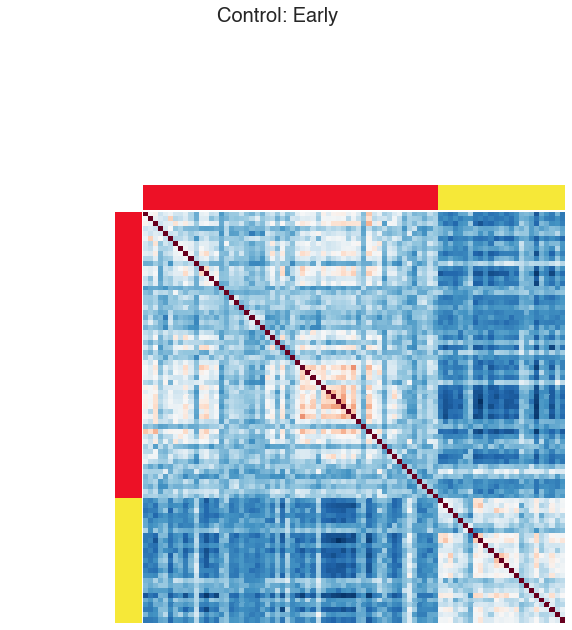

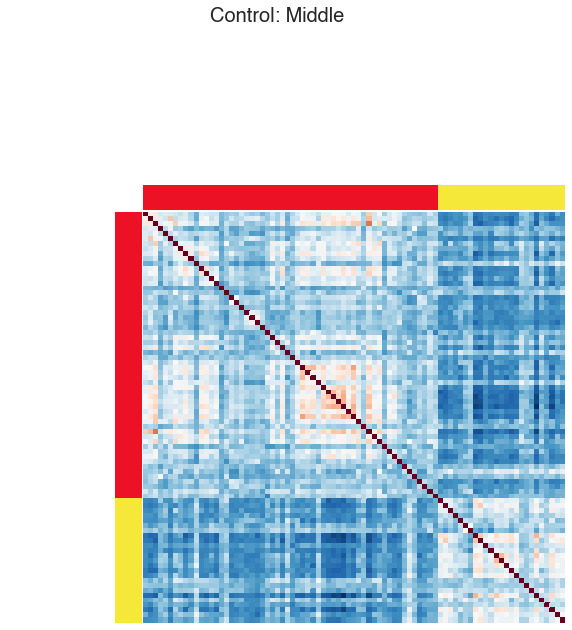

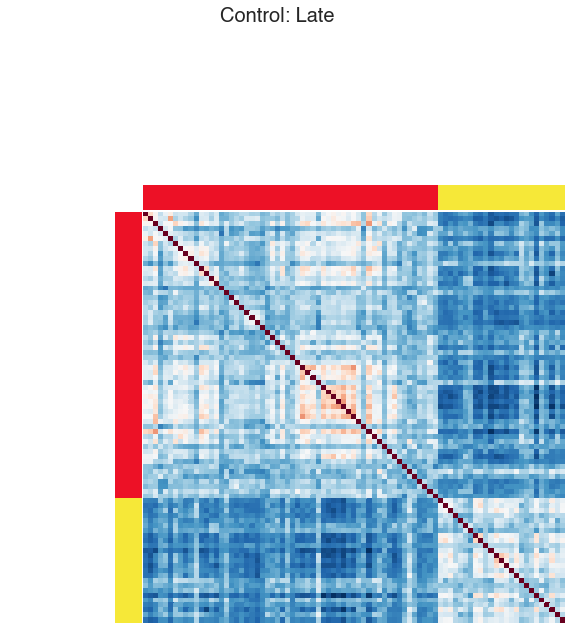

In [13]:
group_vectors = [exp_vector, con_vector]
group_label = ['Experimental','Control']
ses_label = ['Naive', 'Early', 'Middle', 'Late']

net_filter = [True if net in ['DM', 'FP'] else False for net in modules]

#--- generating matrix plots with colors for each network
for i, vec in enumerate(group_vectors):
    for j, ses in enumerate(ses_label):
        M = networks.net_filter(P[vec, j, :, :].mean(axis = 0), modules, ['DM', 'FP'])
        ax = figures.matrix_networks_plot(M, 
                                     network_colors[net_filter], 
                                     dpi = 300, colorbar = False, 
                                     group = group_label[i], ses = ses, 
                                     suffix = None, 
                                     out_dir = None)
        


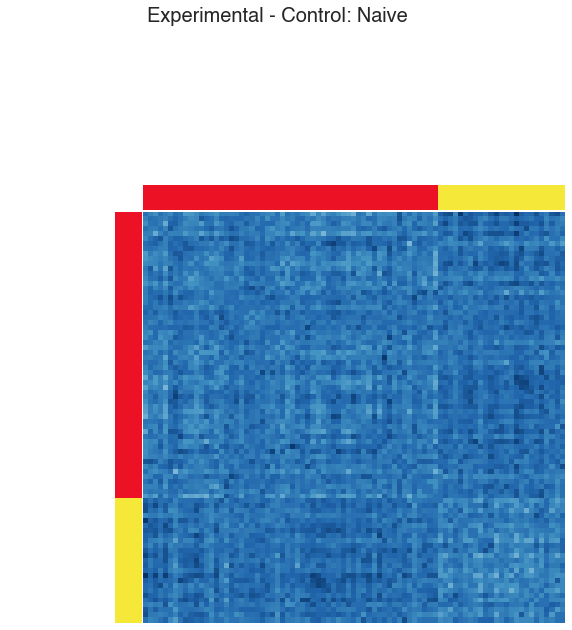

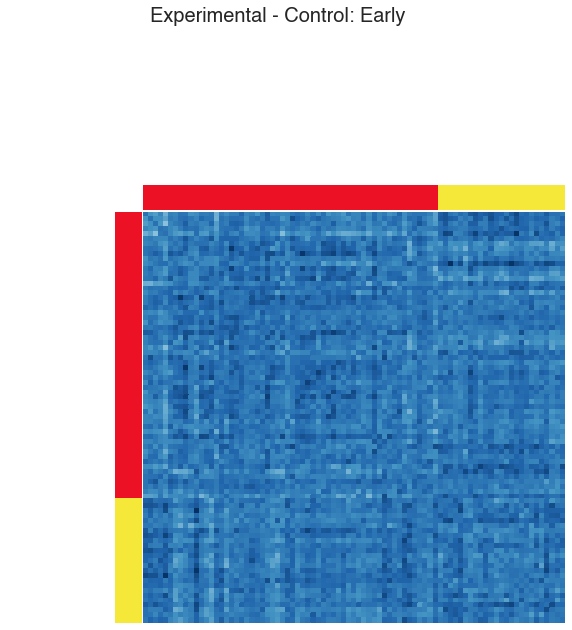

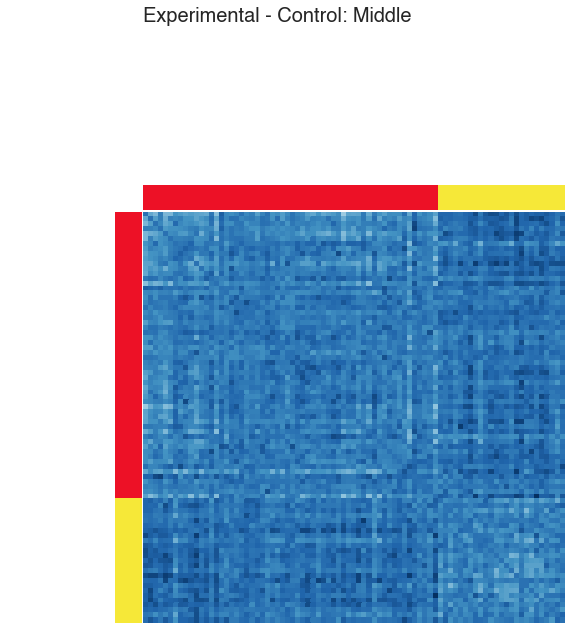

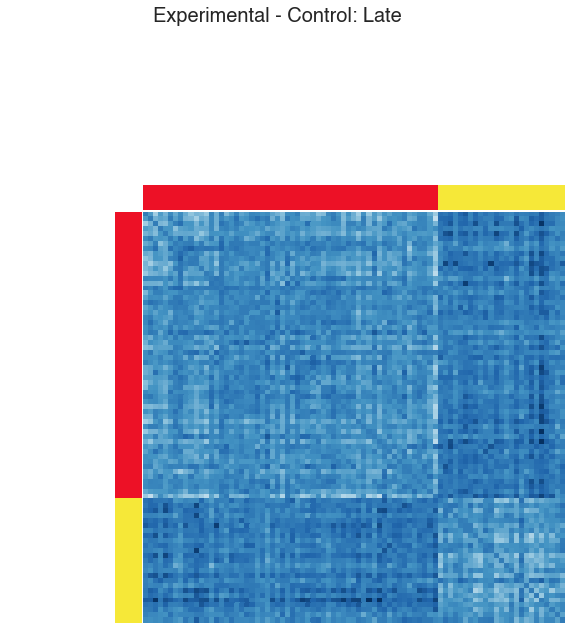

In [17]:
for j, ses in enumerate(ses_label):
    M = networks.net_filter((P[exp_vector, j, :, :].mean(axis = 0) - P[con_vector, j, :, :].mean(axis = 0)), modules, ['DM', 'FP'])
    ax = figures.matrix_networks_plot(M,
                                 network_colors[net_filter], 
                                 dpi = 300, colorbar = False, 
                                 group = "Experimental - Control", ses = ses, 
                                 suffix = None, 
                                 out_dir = None)

In [16]:
# New plot
from nilearn import datasets

# -- loading Power ROIs coordinates
power = datasets.fetch_coords_power_2011()
power_coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

dmfp_filter = [True if net in ['FP', 'DM'] else False for net in modules]
#dm = P[:, :, dm_filter, :]

plotting.view_markers(power_coords[dmfp_filter], 
                      colors = network_colors[dmfp_filter], 
                      marker_size = 11)

/home/finc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The parameter "colors" will be removed in 0.6.0 release of Nilearn. Please use the parameter "marker_color" instead.
  del sys.path[0]
